# Web-scraping Covid-19 data
# Anas Puthawala

Libraries used: pandas, requests, BeautifulSoup, and datetime.
The date of the pull is a few lines down

In [216]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup
from datetime import datetime as dt

In [217]:
#Columns wanted: Country, Total Cases, New Cases, New Deaths, TotalRecovered, ActiveCases, CriticalCases, Totalcase1m, 
# totaltests, totaltest1m

### Pulling website HTML source code using requests library

In [218]:
URL = 'https://www.worldometers.info/coronavirus/#countries%27'

In [219]:
date_execution = dt.now()
html_source = requests.get(URL).text

In [220]:
# mm/dd/YY H:M:S
dt_string = date_execution.strftime("%m/%d/%Y %H:%M:%S")
print("date and time of html pull =", dt_string)

#DATE / TIME OF PULL BELOW

date and time of html pull = 12/17/2021 14:26:54


'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple
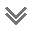

In [221]:
html_source

### Utilizing BeautifulSoup to scrape HTML source code for required columns

In [222]:
soup = soup(html_source)

In [223]:
tableid = 'main_table_countries_today'
table_main = soup.find('table', id=tableid)
table_main

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [224]:
table_data = table_main.tbody.find_all('tr', style=["", "background-color:#EAF7D5", "background-color:#F0F0F0"])

In [225]:
table_data

[<tr style="">
 <td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">51,494,853</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+59,201</td>
 <td style="font-weight: bold; text-align:right;">825,542 </td>
 <td style="font-weight: bold; 
                                     text-align:right;background-color:red; color:white">+733</td>
 <td style="font-weight: bold; text-align:right">40,421,817</td>
 <td style="font-weight: bold; text-align:right;background-color:#c8e6c9; color:#000">+15,021</td>
 <td style="text-align:right;font-weight:bold;">10,247,494</td>
 <td style="font-weight: bold; text-align:right">15,687</td>
 <td style="font-weight: bold; text-align:right">154,255</td>
 <td style="font-weight: bold; text-align:right">2,473</td>
 <td style="font-weight: 

### Making a dictionary to convert later into pandas dataframe

In [226]:
d = {}
t = []
for i in table_data:
    cols = i.find_all('td')
    cols_info = [col.text.strip() for col in cols][1:15]
    d[cols_info[0]] = cols_info[1:]

In [227]:
df = pd.DataFrame(d).transpose()

In [228]:
df.index.rename('Country', inplace=True)
column_names=['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'New Recovered', 'ActiveCases', 'CriticalCases', 'Totcase1M', 'Totdeath1M', 'TotalTests', 'Tottest1M', 'Population']
df.columns = column_names
df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,New Recovered,ActiveCases,CriticalCases,Totcase1M,Totdeath1M,TotalTests,Tottest1M,Population
Country,,,,,,,,,,,,,
USA,"51,494,853","+59,201","825,542",+733,"40,421,817","+15,021","10,247,494","15,687","154,255","2,473","784,081,980","2,348,754","333,828,917"
India,"34,726,049",,"476,869",,"34,162,765","+7,886","86,415","8,944","24,809",341,"661,507,694","472,589","1,399,754,028"
Brazil,"22,204,941",,"617,521",,"21,414,318",,"173,102","8,318","103,395","2,875","63,776,166","296,966","214,759,325"
UK,"11,190,354","+93,045","147,048",+111,"9,697,659","+39,284","1,345,647",875,"163,589","2,150","384,287,490","5,617,804","68,405,286"
Russia,"10,159,389","+27,743","295,104","+1,080","8,914,225","+37,437","950,060","2,300","69,573","2,021","234,000,000","1,602,459","146,025,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,3,,,,3,,0,,15,,,,"200,334"
Saint Helena,2,,,,2,,0,,328,,,,"6,103"
Micronesia,1,,,,1,,0,,9,,,,"116,778"


Dropping unwanted columns: 'New Recovered', 'Population'

In [229]:
unwanted_cols = ['New Recovered', 'Population']

In [230]:
df = df.drop(unwanted_cols, axis=1)

In [231]:
df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,CriticalCases,Totcase1M,Totdeath1M,TotalTests,Tottest1M
Country,,,,,,,,,,,
USA,"51,494,853","+59,201","825,542",+733,"40,421,817","10,247,494","15,687","154,255","2,473","784,081,980","2,348,754"
India,"34,726,049",,"476,869",,"34,162,765","86,415","8,944","24,809",341,"661,507,694","472,589"
Brazil,"22,204,941",,"617,521",,"21,414,318","173,102","8,318","103,395","2,875","63,776,166","296,966"
UK,"11,190,354","+93,045","147,048",+111,"9,697,659","1,345,647",875,"163,589","2,150","384,287,490","5,617,804"
Russia,"10,159,389","+27,743","295,104","+1,080","8,914,225","950,060","2,300","69,573","2,021","234,000,000","1,602,459"
...,...,...,...,...,...,...,...,...,...,...,...
Samoa,3,,,,3,0,,15,,,
Saint Helena,2,,,,2,0,,328,,,
Micronesia,1,,,,1,0,,9,,,


### Removing unwanted characters / Converting numbers to ints

In [232]:
# From inspection we can see that the 'NewCases' and 'NewDeaths' column is the only column that has unwanted characters ('+').
# The list of unwanted characters is “/”, “\n”, “|”, “+”

df['NewCases'] = df['NewCases'].str.replace('+','')
df['NewDeaths'] = df['NewDeaths'].str.replace('+','')

#Replace the commas as well since excel files will initially pick it up as a string and need to get converted to number afterwards
df.replace(',','', regex=True, inplace=True) #Will get rid of the ',' so excel can pick it up as numbers easily


df = df.apply(pd.to_numeric, errors='coerce')

<ipython-input-232-4c431fd71451>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewCases'] = df['NewCases'].str.replace('+','')
<ipython-input-232-4c431fd71451>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewDeaths'] = df['NewDeaths'].str.replace('+','')


In [233]:
df.dtypes

TotalCases          int64
NewCases          float64
TotalDeaths       float64
NewDeaths         float64
TotalRecovered    float64
ActiveCases       float64
CriticalCases     float64
Totcase1M         float64
Totdeath1M        float64
TotalTests        float64
Tottest1M         float64
dtype: object

### Outputting it as a excel file

In [234]:
file_name = 'Covid_19_webscrape.xlsx'
df.to_excel(file_name)